# News groups Classification

# Data:
Data contains of various documents which belongs to various groups such as

*Atheism

*Religion

*Graphics

*Medical

*Space

*Electronics

# Problem:

This is classification problem, We need to predict the different groups of documents.
 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn.datasets as skd


In [2]:
#reading the train and test data.
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med','sci.space','sci.electronics']
train=skd.load_files('C:/Users/sandeep/Desktop/INTERNSHIP/data/20_newgroup/train',categories=categories,encoding='ISO-8859-1')

test=skd.load_files('C:/Users/sandeep/Desktop/INTERNSHIP/data/20_newgroup/test',categories=categories,encoding='ISO-8859-1')

In [11]:
print(type(train))

<class 'sklearn.utils.Bunch'>


In [12]:
#checking the different categories in the data.
print(train.target_names)

['alt.atheism', 'comp.graphics', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian']


In [20]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian']

In [21]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian']

In [22]:
# splitting the data data into train and validation.
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train.data,train.target,train_size=0.7,
                                                       random_state=1234)

In [23]:
#checking the length of the train and validation.
print(len(x_train))
print(len(x_valid))

4197
1800


In [24]:
#importing the TF-IDF vectorizer converting the train and validation into vectors.
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',decode_error='ignore')
trian_tf=tf.fit_transform(x_train)
valid_tf=tf.transform(x_valid)

In [25]:
# checking the shape of train and validation after transformation.
print(trian_tf.shape)
print(valid_tf.shape)

(4197, 62016)
(1800, 62016)


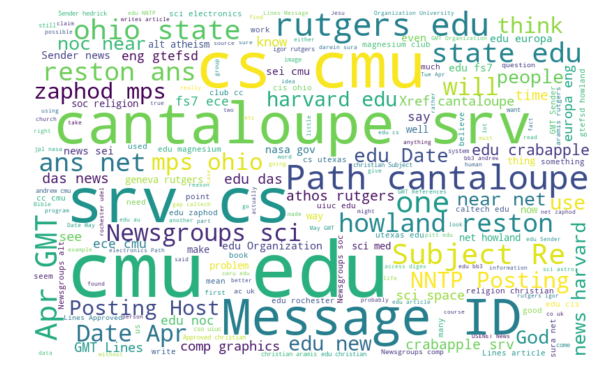

In [26]:
# importing the worldcloud library.
#checking the most frequently used words in the 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
all_words = ' '.join([text for text in x_train])

wordcloud = WordCloud(width=800, background_color='white',height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

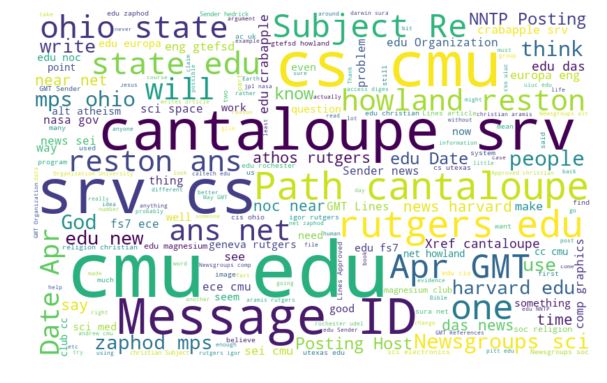

In [27]:
all_words = ' '.join([text for text in x_valid])

wordcloud = WordCloud(width=800, background_color='white',height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
#model 1 
from sklearn.naive_bayes import MultinomialNB
navie=MultinomialNB()
navie.fit(trian_tf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
from sklearn.metrics import classification_report
train_pred1=navie.predict(trian_tf)
valid_pred1=navie.predict(valid_tf)

##checking the classification report and accuracy of the model
print("Train_Classification Report: \n\n", classification_report(y_train,train_pred1))
print("\n\nvalid_Classification Report: \n\n", classification_report(y_valid,valid_pred1))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       704
           1       0.98      0.99      0.99       707
           2       0.99      0.99      0.99       712
           3       1.00      0.98      0.99       686
           4       0.98      1.00      0.99       700
           5       0.99      1.00      0.99       688

    accuracy                           0.99      4197
   macro avg       0.99      0.99      0.99      4197
weighted avg       0.99      0.99      0.99      4197



valid_Classification Report: 

               precision    recall  f1-score   support

           0       0.98      0.97      0.98       296
           1       0.94      0.97      0.95       293
           2       0.95      0.94      0.95       288
           3       0.99      0.94      0.96       314
           4       0.96      0.97      0.96       300
           5       0.97      1.00      0.99       309

    accurac

In [30]:
#model 2
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
log.fit(trian_tf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
train_pred2=log.predict(trian_tf)
valid_pred2=log.predict(valid_tf)

##checking the classification report and accuracy of the model
print("Train_Classification Report: \n\n", classification_report(y_train,train_pred2))
print("\n\nvalid_Classification Report: \n\n", classification_report(y_valid,valid_pred2))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       0.99      1.00      0.99       707
           2       1.00      1.00      1.00       712
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00       700
           5       1.00      1.00      1.00       688

    accuracy                           1.00      4197
   macro avg       1.00      1.00      1.00      4197
weighted avg       1.00      1.00      1.00      4197



valid_Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       296
           1       0.98      1.00      0.99       293
           2       0.97      0.98      0.98       288
           3       0.98      0.98      0.98       314
           4       0.99      0.97      0.98       300
           5       1.00      1.00      1.00       309

    accurac

In [32]:
#model 3
from sklearn.svm import SVC
svc=SVC()
svc.fit(trian_tf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
train_pred3=svc.predict(trian_tf)
valid_pred3=svc.predict(valid_tf)

##checking the classification report and accuracy of the model
print("Train_Classification Report: \n\n", classification_report(y_train,train_pred3))
print("\n\nvalid_Classification Report: \n\n", classification_report(y_valid,valid_pred3))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       704
           1       0.99      1.00      1.00       707
           2       1.00      1.00      1.00       712
           3       1.00      1.00      1.00       686
           4       1.00      1.00      1.00       700
           5       1.00      1.00      1.00       688

    accuracy                           1.00      4197
   macro avg       1.00      1.00      1.00      4197
weighted avg       1.00      1.00      1.00      4197



valid_Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       296
           1       0.98      0.98      0.98       293
           2       0.95      0.98      0.97       288
           3       0.97      0.97      0.97       314
           4       0.99      0.97      0.98       300
           5       1.00      0.99      1.00       309

    accurac

In [34]:
test_tf=tf.transform(test)

In [35]:
test_preds=log.predict(test_tf)

In [36]:
test_preds

array([2, 1, 1, 1, 1])

In [37]:
new_doc='Earth orbital velocity at 300 km altitude,equatorial radius of Earth.'

In [38]:
new_doc=[new_doc]

In [39]:
doc_tf=tf.transform(new_doc)

In [40]:
predic=log.predict(doc_tf)

In [41]:
predic

array([4])

In [42]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian']

In [54]:
#defining a function which automatically predict and print the group of document. 
def  predict(document):
    doc=[document]
    doc_tf=tf.transform(doc)
    predict=log.predict(doc_tf)
    if predict==0:
        print('Atheism')
    elif predict==1:
        print('Graphics')
    elif predict==2:
        print('Electronics')
    elif predict==3:
        print('Medical')
    elif predict==4:
        print('Space')
    else:
        print('Religion')

In [55]:
#Our model correctly correctly predicts this document as "space"
document='Earth orbital velocity at 300 km altitude,equatorial radius of Earth.'
predict(document)

Space


In [57]:
#Our model correctly correctly predicts this document as "Medical"
document='Although the _miracle berry_, a plant native to West Africa is practically tasteless, it temporarily changes the taste of other substances.  Miracle berries contain a protein, _miraculin_, that modifies sweet receptors in such a way that they can be stimulated by acids.' 

predict(document)


Medical


In [58]:
#Our model correctly correctly predicts this document as "Graphics"
document='The problem is not precisely defined above, but if you need to find the smallest convex polygon that encloses a given polygon, then you are seeking the convex hull of your original polygon.  There are two ways to do this:  use a somewhat tricky but by-now well examined linear-time algorithm that exploits the polygon boundary,'
predict(document)

Graphics


In [62]:
# Our model correctly correctly predicts this document as "Electronics"
doc='Intel does make Eproms with built in address latches.I fear that you would need a very flexible and up-to-date eprom programmer to write to them give them a call.I am not able to locate their memory products book yet.'
predict(doc)

Electronics
